Convolutional neural networks
=============================

In this exercise, we will have a go at Convolutional Neural Networks (CNNs). This type of Neural Networks specializes in image treatment.

This time round, we will be using a wrapper on top of tensorflow to make our life easier. [TFLearn](http://tflearn.org/) exposes a higher level API for Tensorflow.

In [1]:
import sys
sys.path.append("/eos/user/d/dcampora/lab/site-packages")

# Import tflearn and some helpers
import tensorflow as tf
import tflearn
from tflearn.data_utils import shuffle, to_categorical
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation
from tflearn.optimizers import SGD 
from __future__ import division, print_function, absolute_import

hdf5 is not supported on this machine (please install/reinstall h5py for optimal experience)


The [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The classes of images in CIFAR-10 are:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Let's load the first batch, and show some of its pictures.

Some random pictures


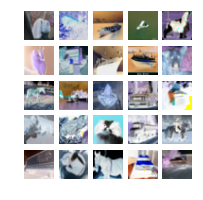

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cPickle

# CIFAR-10 types
(AIRPLANE, AUTOMOBILE, BIRD, CAT, DEER, DOG, FROG, HORSE, SHIP, TRUCK) = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

# Load first data batch
f = open('/eos/user/d/dcampora/lab/cifar-10-batches-py/data_batch_1', 'rb')
data_batch_dict = cPickle.load(f)
f.close()
x = data_batch_dict['data']
y = data_batch_dict['labels']
x = x.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype('float')
y = np.array(y)

# Visualize CIFAR 10
print("Some random pictures")
fig, axes1 = plt.subplots(5,5,figsize=(3,3))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(x)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(x[i:i+1][0])
        
# Shuffle and normalize data
x, y = shuffle(x, y)
x = x / 256.
y = to_categorical(y, 10)

Note the images you see vary quite a lot. The images have different colors and shapes, but also are taken from different angles, some of them are cropped or stretched, and the object is not always easily distinguishible, to the point sometimes it wouldn't be easy for a human to classify such picture.

We have the data, now we need the validation set, and we are ready to work with CIFAR-10.

In [ ]:
# Load validation set
f = open('/eos/user/d/dcampora/lab/cifar-10-batches-py/test_batch', 'rb')
test_batch_dict = cPickle.load(f)
f.close()
x_test = test_batch_dict['data'] 
y_test = test_batch_dict['labels']
x_test = x_test.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype('float')
y_test = np.array(y_test)
y_test = to_categorical(y_test, 10)

Exercise 2
==========
Our objective is to classify the pictures as accurately as possible, using a CNN and the ideas we have discussed in the lectures.

First, let's tell the framework to generate more data for us, and to generalize the images as required.

We also need to define our neural network. Here is a basic structure of it, with a convolutional layer, a pooling layer and a fully connected layer, to produce an output.

In [ ]:
# This command is needed for every fresh run
tf.reset_default_graph()

# Make sure the data is normalized
img_prep = ImagePreprocessing()
img_prep.add_featurewise_zero_center()
img_prep.add_featurewise_stdnorm()

# Create extra synthetic training data by flipping, rotating and blurring the
# images on our data set.
img_aug = ImageAugmentation()
img_aug.add_random_flip_leftright()
img_aug.add_random_rotation(max_angle=25.)
img_aug.add_random_blur(sigma_max=3.)

# CNN input
network = input_data(shape=[None, 32, 32, 3],
                     data_preprocessing=img_prep,
                     data_augmentation=img_aug)

# Convolutional layer
network = conv_2d(network, 32, 3, activation='relu')

# Max pool layer
network = max_pool_2d(network, 2)

# Fully connected layer
network = fully_connected(network, 10, activation='softmax')

# Learning rule: Stochastic gradient descent
sgd = SGD(learning_rate=0.01, lr_decay=0.96, decay_step=100)

network = regression(network,
                     optimizer=sgd,
                     loss='categorical_crossentropy')

# Run our network
model = tflearn.DNN(network, tensorboard_verbose=0)
model.fit(x, y, n_epoch=10, shuffle=True, validation_set=(x_test, y_test),
      show_metric=True, batch_size=96)

Training Step: 917  | total loss: 1.64122 | time: 4.054s
| SGD | epoch: 009 | loss: 1.64122 - acc: 0.4241 -- iter: 07392/10000


Unfortunately, the neural network given here is not very accurate.

* Modify the Convolutional Neural Network defined above in order to increase the accuracy of your learning.
* Hint 1: [TFLearn documentation](http://tflearn.org/getting_started/).
* Hint 2: You may want to draw some [inspiration](https://adeshpande3.github.io/adeshpande3.github.io/The-9-Deep-Learning-Papers-You-Need-To-Know-About.html).